## Imports

In [1]:
import pandas as pd
import json
from IPython.display import display, HTML
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Extract Relevant Data from Json

In [2]:
with open('phy-IEEE802.11.json', 'r') as openfile:
    wlan = json.load(openfile)

In [3]:
wlan_df = pd.DataFrame()

for device in wlan:    
    wlan_data = {
        "key": [device['kismet.device.base.key']], 
        "device_name": [device['kismet.device.base.name']],
        "device_type": [device['kismet.device.base.type']],
        "num_packets": [device['kismet.device.base.packets.total']],
        "manuf": [device['kismet.device.base.manuf']], 
        "macaddr": [device['kismet.device.base.macaddr']],
        "channel": [device['kismet.device.base.channel']],
        "first_seen": [device['kismet.device.base.first_time']], 
        "last_seen": [device['kismet.device.base.last_time']]

    }
    
    wlan_df = pd.concat([wlan_df, pd.DataFrame(wlan_data)], ignore_index=True)

In [4]:
# displaying the dataframe
display(HTML(wlan_df.to_html()))
# display(wlan_df)

,key,device_name,device_type,num_packets,manuf,macaddr,channel,first_seen,last_seen
0,4202770D00000000_70B9E77FF36C,wahoo,Wi-Fi AP,1759,Aruba Networks HP,6C:F3:7F:E7:B9:70,40,1681162297,1681168027
1,4202770D00000000_71B9E77FF36C,eduroam,Wi-Fi AP,3249,Aruba Networks HP,6C:F3:7F:E7:B9:71,40,1681162297,1681168027
2,4202770D00000000_73B9E77FF36C,UVA WiFi Setup,Wi-Fi AP,1810,Aruba Networks HP,6C:F3:7F:E7:B9:73,40,1681162297,1681168027
3,4202770D00000000_72B9E77FF36C,UVA Guest,Wi-Fi AP,1808,Aruba Networks HP,6C:F3:7F:E7:B9:72,40,1681162297,1681168027
4,4202770D00000000_52DAE77FF36C,UVA Guest,Wi-Fi AP,1772,Aruba Networks HP,6C:F3:7F:E7:DA:52,52,1681162297,1681168023
5,4202770D00000000_53DAE77FF36C,UVA WiFi Setup,Wi-Fi AP,1763,Aruba Networks HP,6C:F3:7F:E7:DA:53,52,1681162297,1681168023
6,4202770D00000000_50DAE77FF36C,wahoo,Wi-Fi AP,1752,Aruba Networks HP,6C:F3:7F:E7:DA:50,52,1681162297,1681168016
7,4202770D00000000_11D4E77FF36C,,Wi-Fi AP,0,Aruba Networks HP,6C:F3:7F:E7:D4:11,44,1681162297,1681167574
8,4202770D00000000_696CC0AEA17C,,Wi-Fi Client,312,Apple,7C:A1:AE:C0:6C:69,64,1681162297,1681167892
9,4202770D00000000_917EE77FF36C,eduroam,Wi-Fi AP,2745,Aruba Networks HP,6C:F3:7F:E7:7E:91,64,1681162297,1681168024


In [5]:
#Check df info to make sure we don't have any null/nan values
wlan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 9 columns):
key            1111 non-null object
device_name    1111 non-null object
device_type    1111 non-null object
num_packets    1111 non-null int64
manuf          1111 non-null object
macaddr        1111 non-null object
channel        1111 non-null object
first_seen     1111 non-null int64
last_seen      1111 non-null int64
dtypes: int64(3), object(6)
memory usage: 78.2+ KB


## Generate Analysis + Visuals

#### Distribution of Device Types

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (6,4))
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
    
print(wlan_df['device_type'].value_counts())
fig = wlan_df['device_type'].value_counts(dropna=True).plot(kind='bar', rot=0)
plt.show()

Wi-Fi Client     996
Wi-Fi AP          74
Wi-Fi Device      35
Wi-Fi Bridged      5
Wi-Fi Ad-Hoc       1
Name: device_type, dtype: int64


<Figure size 600x400 with 1 Axes>

#### Distribution of Devices 

                     1048
UVA WiFi Setup         17
UVA Guest              15
eduroam                15
wahoo                  12
6C:F3:7F:E7:CF:10       1
6C:F3:7F:E7:B9:F0       1
6C:F3:7F:E7:90:50       1
62:45:B0:3F:77:AB       1
Name: device_name, dtype: int64


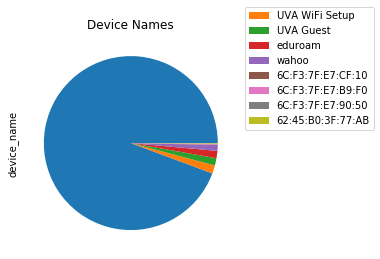

In [7]:
    
print(wlan_df['device_name'].value_counts())
chart = wlan_df['device_name'].value_counts(dropna=True).plot(kind='pie',legend=True, title="Device Names", labeldistance=None) #autopct="%1.0f%%"
chart.legend(bbox_to_anchor=(1, 1.15), loc='upper left')


#### Time Data --> First/Last Seen Timestamp : Device Mapping, Total Time Chart, ...

In [8]:
#Device mapping to first/last seen

#getting time data associated with a specific device (id'd by macaddr)
time_data = wlan_df[["macaddr",  "num_packets", "first_seen", "last_seen"]]
diff = time_data['last_seen'] - time_data['first_seen']
hours = diff / 3600
time_data['time_between (hours)'] = hours


#converting unix timestamp to a readable string version for viewing
for i in time_data['first_seen'].values:
    new_i = datetime.utcfromtimestamp(int(i)).strftime('%Y-%m-%d %H:%M:%S')
    time_data['first_seen'].replace(i, new_i, inplace = True)
for i in time_data['last_seen'].values:
    new_i = datetime.utcfromtimestamp(int(i)).strftime('%Y-%m-%d %H:%M:%S')
    time_data['last_seen'].replace(i, new_i, inplace = True)

#styling table
time_data.style.hide_index()
time_data.style.set_properties(**{'border': '1.3px solid green',
                          'color': 'blue'})

# display(time_data)
display(HTML(time_data.to_html()))

,macaddr,num_packets,first_seen,last_seen,time_between (hours)
0,6C:F3:7F:E7:B9:70,1759,2023-04-10 21:31:37,2023-04-10 23:07:07,1.591667
1,6C:F3:7F:E7:B9:71,3249,2023-04-10 21:31:37,2023-04-10 23:07:07,1.591667
2,6C:F3:7F:E7:B9:73,1810,2023-04-10 21:31:37,2023-04-10 23:07:07,1.591667
3,6C:F3:7F:E7:B9:72,1808,2023-04-10 21:31:37,2023-04-10 23:07:07,1.591667
4,6C:F3:7F:E7:DA:52,1772,2023-04-10 21:31:37,2023-04-10 23:07:03,1.590556
5,6C:F3:7F:E7:DA:53,1763,2023-04-10 21:31:37,2023-04-10 23:07:03,1.590556
6,6C:F3:7F:E7:DA:50,1752,2023-04-10 21:31:37,2023-04-10 23:06:56,1.588611
7,6C:F3:7F:E7:D4:11,0,2023-04-10 21:31:37,2023-04-10 22:59:34,1.465833
8,7C:A1:AE:C0:6C:69,312,2023-04-10 21:31:37,2023-04-10 23:04:52,1.554167
9,6C:F3:7F:E7:7E:91,2745,2023-04-10 21:31:37,2023-04-10 23:07:04,1.590833


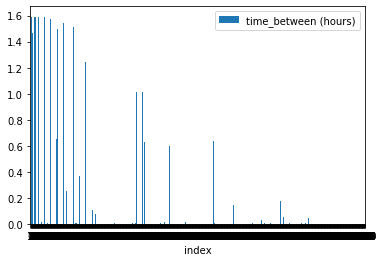

In [9]:
#graph of time_between (last_seen - first_seen) for each device
graph = time_data.reset_index().plot(x="index",  y=["time_between (hours)"], xticks=[], kind="bar", rot=0)

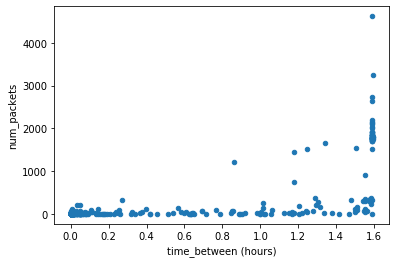

In [10]:
time_data.plot.scatter('time_between (hours)', 'num_packets')


[]

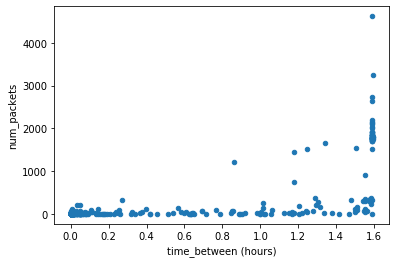

In [22]:
fig = time_data.plot.scatter('time_between (hours)', 'num_packets')
fig.plot(loglog=True, legend=False)

# fig.plot(logy=True, logx=True)    


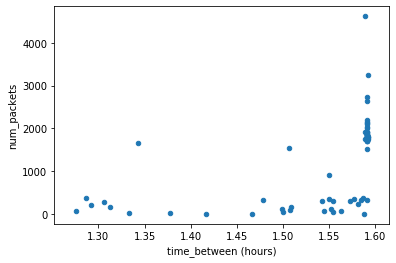

In [12]:
time_data[time_data['time_between (hours)']>1.25].plot.scatter('time_between (hours)', 'num_packets')

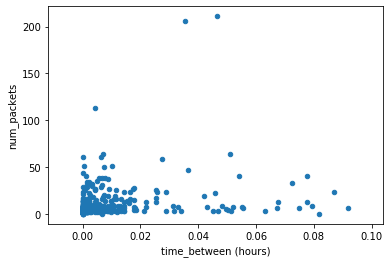

In [13]:
time_data[time_data['time_between (hours)']<0.1].plot.scatter('time_between (hours)', 'num_packets')

#### Distribution of Device Manufacturers

Unknown                                       644
Apple                                         328
Aruba Networks HP                              74
Intel Corporation                              41
Microsoft Corporation                           2
ICANN, IANA Department                          2
Liteon Technology Corporation                   1
Nintendo Ltd                                    1
TP-Link Technologies Ltd                        1
HP Inc.                                         1
BrightSign LLC                                  1
Xiaomi Communications Ltd                       1
Murata Manufacturing Ltd                        1
Samsung Electronics Ltd                         1
Raspberry Pi Trading Ltd                        1
Netgear                                         1
Legra Systems Inc.                              1
Skylab M&C Technology Ltd                       1
Cloud Network Technology Singapore PTE Ltd      1
Azurewave Technologies Inc.                     1


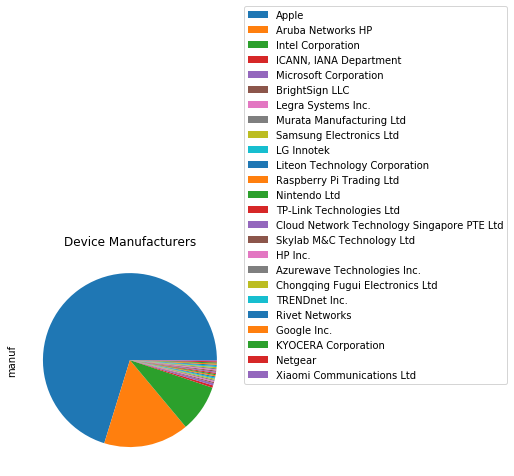

In [14]:
# Define the ratio of gap of each fragment in a tuple
# explode = (0.05, 0.05, 0.05, 0.05, 0.05)
    
print(wlan_df['manuf'].value_counts())
chart = wlan_df[~wlan_df["manuf"].str.contains('Unknown', na=False)]['manuf'].value_counts().plot(kind='pie', legend=True, title="Device Manufacturers", labeldistance=None) #autopct="%1.0f%%"
chart.legend(bbox_to_anchor=(1, 2.15), loc='upper left')


#### Packet Data

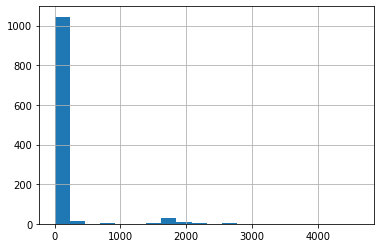

In [15]:
wlan_df['num_packets'].hist(bins=20)

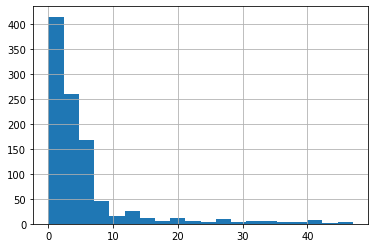

In [16]:
wlan_df[wlan_df['num_packets']<50]['num_packets'].hist(bins=20)


In [17]:
wlan_df[wlan_df['num_packets']<10]

,key,device_name,device_type,num_packets,manuf,macaddr,channel,first_seen,last_seen
7,4202770D00000000_11D4E77FF36C,,Wi-Fi AP,0,Aruba Networks HP,6C:F3:7F:E7:D4:11,44,1681162297,1681167574
19,4202770D00000000_7394FF002500,,Wi-Fi Ad-Hoc,0,Apple,00:25:00:FF:94:73,60,1681162299,1681168016
37,4202770D00000000_9350E97FF36C,UVA WiFi Setup,Wi-Fi AP,3,Aruba Networks HP,6C:F3:7F:E9:50:93,48,1681162301,1681162341
38,4202770D00000000_F7ECE06E0906,,Wi-Fi Client,1,Unknown,06:09:6E:E0:EC:F7,,1681162301,1681162301
53,4202770D00000000_70359D7BF222,,Wi-Fi Client,1,Unknown,22:F2:7B:9D:35:70,,1681162305,1681162305
...,...,...,...,...,...,...,...,...,...
1105,4202770D00000000_4C398432EA94,,Wi-Fi Client,1,Apple,94:EA:32:84:39:4C,136,1681168001,1681168001
1106,4202770D00000000_6A7A46DDB1F8,,Wi-Fi Client,2,Apple,F8:B1:DD:46:7A:6A,,1681168002,1681168002
1107,4202770D00000000_2140281FEB30,,Wi-Fi Client,8,Skylab M&C Technology Ltd,30:EB:1F:28:40:21,,1681168006,1681168010
1109,4202770D00000000_D0D55235AFC6,,Wi-Fi Client,3,Unknown,C6:AF:35:52:D5:D0,,1681168012,1681168012


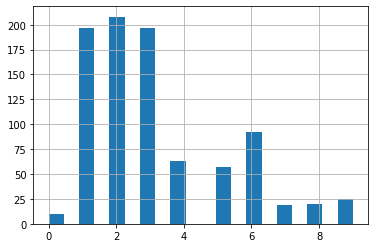

In [18]:
wlan_df[wlan_df['num_packets']<10]['num_packets'].hist(bins=20)

In [19]:
wlan_df[wlan_df['num_packets']>500]


,key,device_name,device_type,num_packets,manuf,macaddr,channel,first_seen,last_seen
0,4202770D00000000_70B9E77FF36C,wahoo,Wi-Fi AP,1759,Aruba Networks HP,6C:F3:7F:E7:B9:70,40,1681162297,1681168027
1,4202770D00000000_71B9E77FF36C,eduroam,Wi-Fi AP,3249,Aruba Networks HP,6C:F3:7F:E7:B9:71,40,1681162297,1681168027
2,4202770D00000000_73B9E77FF36C,UVA WiFi Setup,Wi-Fi AP,1810,Aruba Networks HP,6C:F3:7F:E7:B9:73,40,1681162297,1681168027
3,4202770D00000000_72B9E77FF36C,UVA Guest,Wi-Fi AP,1808,Aruba Networks HP,6C:F3:7F:E7:B9:72,40,1681162297,1681168027
4,4202770D00000000_52DAE77FF36C,UVA Guest,Wi-Fi AP,1772,Aruba Networks HP,6C:F3:7F:E7:DA:52,52,1681162297,1681168023
5,4202770D00000000_53DAE77FF36C,UVA WiFi Setup,Wi-Fi AP,1763,Aruba Networks HP,6C:F3:7F:E7:DA:53,52,1681162297,1681168023
6,4202770D00000000_50DAE77FF36C,wahoo,Wi-Fi AP,1752,Aruba Networks HP,6C:F3:7F:E7:DA:50,52,1681162297,1681168016
9,4202770D00000000_917EE77FF36C,eduroam,Wi-Fi AP,2745,Aruba Networks HP,6C:F3:7F:E7:7E:91,64,1681162297,1681168024
10,4202770D00000000_50DBE77FF36C,wahoo,Wi-Fi AP,1733,Aruba Networks HP,6C:F3:7F:E7:DB:50,52,1681162297,1681168023
11,4202770D00000000_51DAE77FF36C,eduroam,Wi-Fi AP,2642,Aruba Networks HP,6C:F3:7F:E7:DA:51,52,1681162297,1681168023


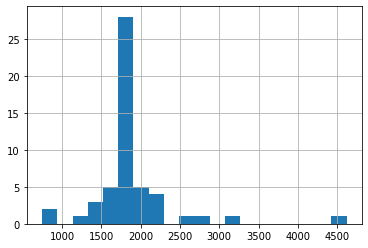

In [20]:
wlan_df[wlan_df['num_packets']>500]['num_packets'].hist(bins=20)